In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', 100)
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

df = pd.concat([train.drop('price', axis = 1),test], axis = 0)

# correlation

In [13]:
train.iloc[:,1:].corr()[]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1.000000,0.305682,0.526900,0.703226,0.087228,0.266110,0.272579,0.404582,0.038446,0.669244,0.606567,0.323820,0.051072,0.122364,-0.048639,0.307125,0.017397,0.585733,0.084628,0.003447,-0.012591,-0.018753
bedrooms,0.305682,1.000000,0.512589,0.569478,0.039488,0.172039,-0.006742,0.080742,0.031687,0.351321,0.470282,0.301197,0.152038,0.018902,-0.148237,-0.010576,0.125499,0.383481,0.036842,-0.010894,-0.004129,-0.011664
bathrooms,0.526900,0.512589,1.000000,0.751497,0.094212,0.504414,0.065461,0.194207,-0.117231,0.663321,0.681341,0.284331,0.503029,0.054352,-0.200010,0.028537,0.216453,0.565733,0.096685,-0.028967,0.002219,-0.004226
sqft_living,0.703226,0.569478,0.751497,1.000000,0.178813,0.354541,0.111313,0.292829,-0.053039,0.762201,0.875546,0.436274,0.316007,0.055042,-0.197312,0.053525,0.237814,0.757680,0.193703,-0.032295,0.008715,-0.011554
sqft_lot,0.087228,0.039488,0.094212,0.178813,1.000000,-0.001588,0.012633,0.074569,-0.001772,0.111874,0.189401,0.016845,0.057435,0.003194,-0.129746,-0.088012,0.226591,0.145938,0.726757,0.007310,-0.009299,0.004450
floors,0.266110,0.172039,0.504414,0.354541,-0.001588,1.000000,0.035425,0.038704,-0.260526,0.456254,0.525980,-0.246797,0.490417,0.006692,-0.065156,0.052634,0.123263,0.280045,-0.004004,-0.022276,0.015376,-0.003257
waterfront,0.272579,-0.006742,0.065461,0.111313,0.012633,0.035425,1.000000,0.391859,0.012233,0.097573,0.083253,0.075022,-0.017201,0.094939,0.024633,-0.012664,-0.035010,0.089017,0.023608,-0.004699,0.004025,0.012100
view,0.404582,0.080742,0.194207,0.292829,0.074569,0.038704,0.391859,1.000000,0.045144,0.263186,0.174275,0.280680,-0.044941,0.096126,0.078567,0.011474,-0.078047,0.283536,0.073581,0.002100,-0.009616,0.010701
condition,0.038446,0.031687,-0.117231,-0.053039,-0.001772,-0.260526,0.012233,0.045144,1.000000,-0.143437,-0.155351,0.179705,-0.357132,-0.063466,0.000496,-0.014842,-0.102547,-0.090750,0.001173,-0.050913,0.022877,-0.005950
grade,0.669244,0.351321,0.663321,0.762201,0.111874,0.456254,0.097573,0.263186,-0.143437,1.000000,0.752589,0.173760,0.445311,0.014036,-0.185074,0.114358,0.192987,0.711882,0.119812,-0.032203,0.008222,-0.015548


<Figure size 1440x1440 with 0 Axes>

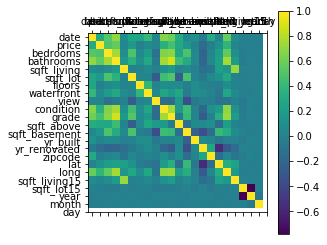

In [21]:
plt.figure(figsize = (20,20))
plt.matshow(train.iloc[:,1:].corr())
plt.xticks(range(len(train.columns)-1), train.iloc[:,1:].columns)
plt.yticks(range(len(train.columns)-1), train.iloc[:,1:].columns)
plt.colorbar()
plt.show()

In [22]:
corr = train.iloc[:,1:].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
price,1,0.305682,0.5269,0.703226,0.0872277,0.26611,0.272579,0.404582,0.0384462,0.669244,0.606567,0.32382,0.0510721,0.122364,-0.048639,0.307125,0.0173971,0.585733,0.0846279,0.00344678,-0.0125908,-0.0187532
bedrooms,0.305682,1,0.512589,0.569478,0.0394883,0.172039,-0.00674242,0.080742,0.031687,0.351321,0.470282,0.301197,0.152038,0.0189016,-0.148237,-0.0105761,0.125499,0.383481,0.0368422,-0.0108943,-0.00412931,-0.0116645
bathrooms,0.5269,0.512589,1,0.751497,0.0942123,0.504414,0.0654609,0.194207,-0.117231,0.663321,0.681341,0.284331,0.503029,0.0543519,-0.20001,0.0285366,0.216453,0.565733,0.0966846,-0.0289673,0.00221861,-0.0042261
sqft_living,0.703226,0.569478,0.751497,1,0.178813,0.354541,0.111313,0.292829,-0.0530394,0.762201,0.875546,0.436274,0.316007,0.0550415,-0.197312,0.0535252,0.237814,0.75768,0.193703,-0.0322954,0.00871519,-0.0115535
sqft_lot,0.0872277,0.0394883,0.0942123,0.178813,1,-0.00158793,0.0126327,0.0745692,-0.00177237,0.111874,0.189401,0.0168449,0.057435,0.00319358,-0.129746,-0.0880119,0.226591,0.145938,0.726757,0.00731008,-0.00929883,0.00445025
floors,0.26611,0.172039,0.504414,0.354541,-0.00158793,1,0.0354248,0.0387039,-0.260526,0.456254,0.52598,-0.246797,0.490417,0.00669185,-0.0651555,0.0526341,0.123263,0.280045,-0.00400372,-0.0222755,0.0153762,-0.00325706
waterfront,0.272579,-0.00674242,0.0654609,0.111313,0.0126327,0.0354248,1,0.391859,0.0122327,0.097573,0.0832528,0.0750216,-0.0172012,0.0949387,0.0246331,-0.0126645,-0.0350104,0.0890167,0.0236081,-0.00469927,0.00402507,0.0120997
view,0.404582,0.080742,0.194207,0.292829,0.0745692,0.0387039,0.391859,1,0.0451436,0.263186,0.174275,0.28068,-0.0449414,0.0961259,0.0785672,0.0114741,-0.0780469,0.283536,0.0735808,0.00210017,-0.00961581,0.0107014
condition,0.0384462,0.031687,-0.117231,-0.0530394,-0.00177237,-0.260526,0.0122327,0.0451436,1,-0.143437,-0.155351,0.179705,-0.357132,-0.0634661,0.000496044,-0.0148424,-0.102547,-0.0907498,0.00117345,-0.0509133,0.0228772,-0.00595009
grade,0.669244,0.351321,0.663321,0.762201,0.111874,0.456254,0.097573,0.263186,-0.143437,1,0.752589,0.17376,0.445311,0.0140358,-0.185074,0.114358,0.192987,0.711882,0.119812,-0.0322027,0.0082217,-0.0155484


# date_type feature & target

## date

In [114]:
print('전체 데이터 개수 : ', len(df),' / ', '구매한 날짜 유니크 수 : ', len(df.date.value_counts()))

전체 데이터 개수 :  21763  /  구매한 날짜 유니크 수 :  370


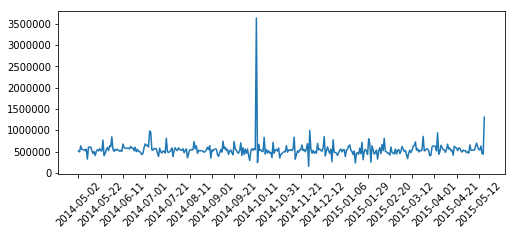

In [118]:
plt.figure(figsize = (8,3))
temp = pd.DataFrame(train.groupby('date')['price'].mean())
temp.reset_index(inplace=True)

plt.plot(temp.date, temp.price)
plt.xticks(temp[::20]['date'], fontsize=10, rotation=45)

plt.show()


In [124]:
temp.loc[temp.price==temp.price.max()]

,date,price
160,2014-10-11,3635000.0


In [128]:
print('train 데이터에서의 2014-10-11 거래 수 : ',sum(train.date == '2014-10-11'))
print('test 데이터에서의 2014-10-11 거래 수 : ',sum(test.date == '2014-10-11'))

train 데이터에서의 2014-10-11 거래 수 :  1
test 데이터에서의 2014-10-11 거래 수 :  1


- 거래 수가 각각 하루씩 존재
- tran 데이터에서 삭제하는 것도 고려해볼 것.

## month

Text(0.5, 0.98, 'Boxplot by year & month')

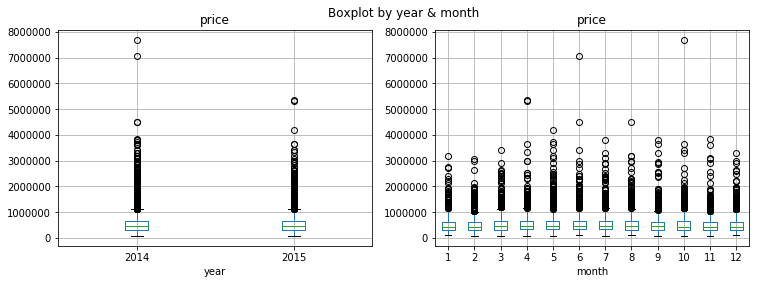

In [93]:
fig, ax = plt.subplots(figsize=(12,4), ncols = 2)
train.boxplot(column=['price'], by='year', ax=ax[0])
train.boxplot(column=['price'], by='month', ax=ax[1])

plt.suptitle('Boxplot by year & month')

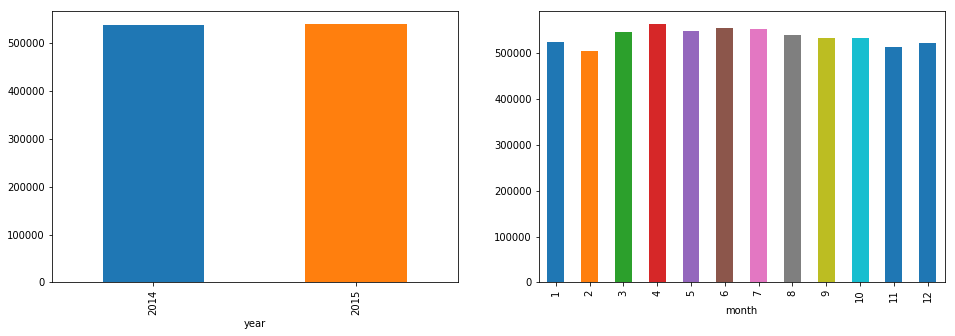

In [102]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
train.groupby(['year'])['price'].mean().plot.bar()
plt.subplot(1,2,2)
train.groupby(['month'])['price'].mean().plot.bar()

- 연도별, 월별로 확인했을 때는 뚜렷한 차이를 보이지 않는다.

## day

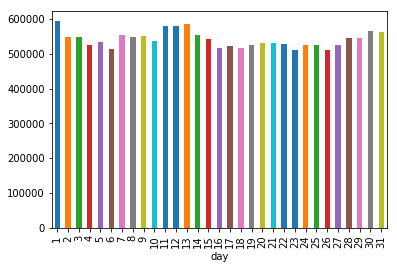

In [130]:
train.groupby(['day'])['price'].mean().plot.bar()

## week - 요일

In [ ]:
import datetime

In [139]:
def to_week(x) :
    year, month, day = (int(xx) for xx in x.split('-'))
    return datetime.date(year, month, day).strftime('%A')

In [141]:
#map 함수는 only for Series
train['week'] = train['date'].map(to_week)
test['week'] = test['date'].map(to_week)

In [143]:
train.week.value_counts()

Tuesday      1468
Wednesday    1371
Monday       1204
Thursday     1187
Friday       1167
Saturday       91
Sunday         67
Name: week, dtype: int64

In [144]:
test.week.value_counts()

Tuesday      1468
Wednesday    1371
Monday       1204
Thursday     1187
Friday       1167
Saturday       91
Sunday         67
Name: week, dtype: int64

- 거래 건수의 입장에서 보면, 주말을 제외하고는 비슷하다.

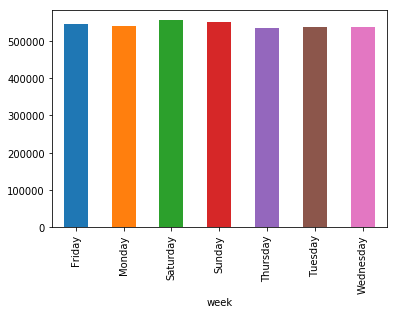

In [145]:
train.groupby(['week'])['price'].mean().plot.bar()

In [148]:
train['week'] = train['week'].map({'Sunday' : 0,'Monday' : 1, "Tuesday" : 2, "Wednesday" : 3,
                                     'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6})
test['week'] = test['week'].map({'Sunday' : 0,'Monday' : 1, "Tuesday" : 2, "Wednesday" : 3,
                                     'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6})

## weekend_or_not

In [153]:
#Saturday or Sunday -> 1
train['weekend'] = 0
train.loc[(train['week'] == 0) | (train['week'] == 6),'weekend'] = 1

test['weekend'] = 0
test.loc[(train['week'] == 0) | (test['week'] == 6),'weekend'] = 1

In [159]:
#train.to_csv('../input/train.csv',index = False)
#test.to_csv('../input/test.csv',index = False)

## yr_renovated

In [ ]:
#여기부터 다시!

## yr_built

# Cateorical features & target

In [161]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'week', 'weekend'],
      dtype='object')

In [171]:
cat_var = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

In [166]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,week,weekend
0,0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,1,0
1,1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,2,0
2,2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,2,0
3,3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,3,0
4,4,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12,1,0


# Numerical features & target